In [1]:
import syntheticModel, Hypercube, SepTensor
import geology
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# make hypercude to describe initial model
x_axis = Hypercube.axis(n=128,
                        o=0.0,
                        d=1)
y_axis = Hypercube.axis(n=128,
                        o=0.0,
                        d=1)
z_axis = Hypercube.axis(n=20,
                        o=0.0,
                        d=1)
hyper = Hypercube.hypercube(axes=[z_axis, y_axis, x_axis])

# make synthetic model builder 
deposit_basement_vp = 2000
basement = {"vp": deposit_basement_vp}
primary = "vp"
geomodel = syntheticModel.geoModel(hyper, basement, primary,seed=97)

# deposit layer
geomodel = geology.deposit(geomodel,
                 prop=deposit_basement_vp,
                 thick=108,
                 interbedThick=3,
                 interbedThickVar=10,
                 interbedPropVar=100,
                 vp_var=0.0)

# add a fault 
geomodel = geology.fault(geomodel,
                 begx=0.5,
                 begy=0.5,
                 begz=0.5,
                 angle=10,
                 indicate=True,
                 radiusFreq=0.1,
                 ruptureLength=50,
                 extentInLine=75,
                 extentCrossLine=200,
                 shift=15,
                 radius=2000,
                 indicateF=True,indicateI=True,
                 indicateMark=1)
# add another fault 
geomodel = geology.fault(geomodel,
                 begx=0.5,
                 begy=0.6,
                 begz=0.5,
                 angle=170,
                 indicate=True,
                 radiusFreq=0.1,
                 ruptureLength=50,
                 extentInLine=75,
                 extentCrossLine=200,
                 shift=15,
                 radius=2000,
                 indicateF=True,indicateI=True,
                 indicateMark=2)

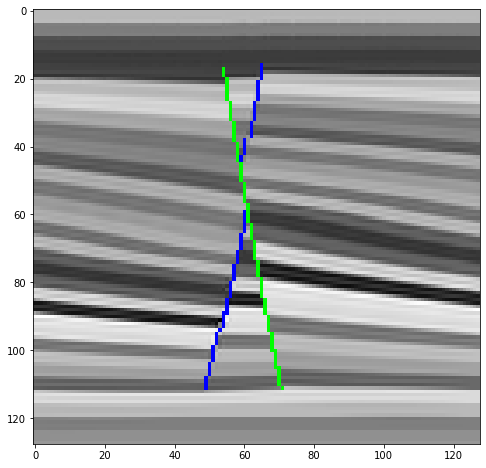

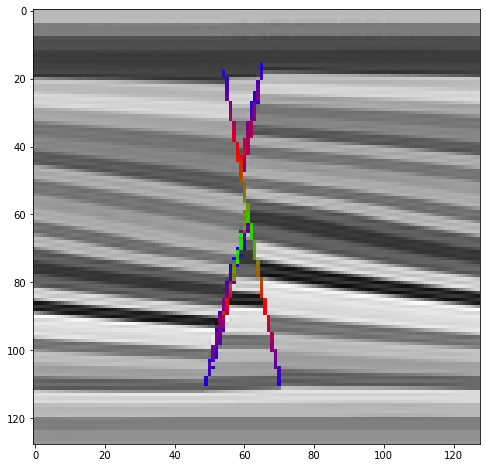

In [18]:
inline_slice = 64

plt.figure(figsize=(8,8))
plt.imshow(geomodel.get('vp').getNdArray()[inline_slice].T,
          cmap='gray')
ind = geomodel.getIndicatorI().getNdArray()
mask = np.ma.masked_where(ind <=  0.03, ind)
plt.imshow(
        mask[inline_slice].T,
        interpolation='none',
        aspect='auto',
        vmin=1,
        vmax=2,
        cmap='brg',
    )

plt.figure(figsize=(8,8))
plt.imshow(geomodel.get('vp').getNdArray()[inline_slice].T,
          cmap='gray')
ind = geomodel.getIndicatorF().getNdArray()
mask = np.ma.masked_where(ind <=  0.05, ind)
plt.imshow(
        mask[inline_slice].T,
        interpolation='none',
        aspect='auto',
        vmin=0,
        vmax=1,
        cmap='brg',
    )

In [4]:
np.amax(geomodel.getIndicatorI().getNdArray())

2